## Importing libraries

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, InputLayer
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras import applications
import matplotlib.pyplot as plt

##Initialization

In [5]:
model_weights = 'bottleneck_fc_model.h5'

## image dimensions
img_h, img_w = 150, 150

## epochs
epochs = 50

## batch Size
batch_size = 32

## total no of train and validation samples
nb_train_samples = 3000
nb_validation_samples = 800

## data set directory
train_data_dir = r'train'
validation_data_dir = r'validation'

##Model

In [6]:
## vgg16 network
model = applications.vgg16.VGG16(include_top = False, weights = 'imagenet', input_shape=(150,150,3))
print('Model loaded.')

top_model = Sequential()
# top_model.add(Dense(128))
top_model.add(Conv2D(128,(3,3),input_shape = model.output_shape[1:]))
top_model.add(BatchNormalization(axis=3))
top_model.add(Activation('relu'))
top_model.add(MaxPooling2D(pool_size = (2, 2)))
top_model.add(Flatten())
top_model.add(Dense(256, activation = 'relu'))
top_model.add(Dropout(0.6))
top_model.add(Dense(1, activation = 'sigmoid'))

top_model.load_weights(model_weights, by_name = True, skip_mismatch = True)

model = Model(inputs=model.input, outputs=top_model(model.output))

for layer in model.layers[:15]:
    layer.trainable = False
    
model.compile(loss = 'binary_crossentropy', 
             optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-4, momentum = 0.9), 
             metrics = ['accuracy'])

58900480/58889256 [==============================] - 0s 0us/step
Model loaded.


##Data Preprocessing

In [7]:
## data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.3, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True, 
                                   rotation_range=20)

test_datagen = ImageDataGenerator(rescale=1. / 255)

## train data
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_w, img_h),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

## validation data
validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                        target_size=(img_w, img_h),
                                                        batch_size=batch_size,
                                                        class_mode='binary')

Found 3000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


##Model Train

Epoch 1/50
71/94 [=====================>........] - ETA: 1:52 - loss: 0.8299 - accuracy: 0.5428

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


94/94 [==============================] - 643s 7s/step - loss: 0.7984 - accuracy: 0.5540 - val_loss: 0.6384 - val_accuracy: 0.5775
Epoch 2/50
94/94 [==============================] - 70s 742ms/step - loss: 0.6945 - accuracy: 0.6093 - val_loss: 0.5704 - val_accuracy: 0.6862
Epoch 3/50
94/94 [==============================] - 69s 733ms/step - loss: 0.6523 - accuracy: 0.6297 - val_loss: 0.5324 - val_accuracy: 0.7237
Epoch 4/50
94/94 [==============================] - 69s 729ms/step - loss: 0.6264 - accuracy: 0.6630 - val_loss: 0.5101 - val_accuracy: 0.7450
Epoch 5/50
94/94 [==============================] - 69s 736ms/step - loss: 0.5898 - accuracy: 0.6727 - val_loss: 0.4972 - val_accuracy: 0.7525
Epoch 6/50
94/94 [==============================] - 69s 726ms/step - loss: 0.5857 - accuracy: 0.6817 - val_loss: 0.4873 - val_accuracy: 0.7600
Epoch 7/50
94/94 [==============================] - 69s 729ms/step - loss: 0.5740 - accuracy: 0.6857 - val_loss: 0.4773 - val_accuracy: 0.7663
Epoch 8/50
9

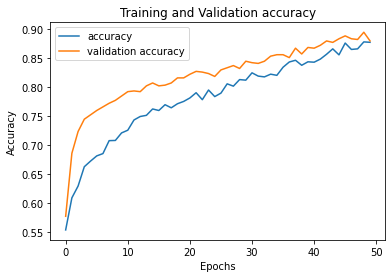

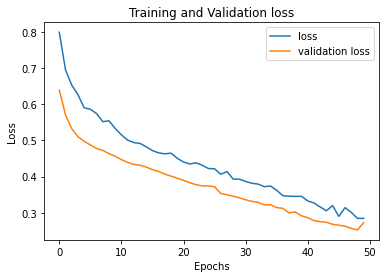

In [8]:
## training and testing model with the data set
history = model.fit(train_generator,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_data = validation_generator)

## plot accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation accuracy')
plt.legend(['accuracy','validation accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## plot loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation loss')
plt.legend(['loss','validation loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()